In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [67]:
data= pd.read_csv("Customer_Data.csv")

In [68]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [69]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [70]:
data.shape

(8950, 18)

In [71]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

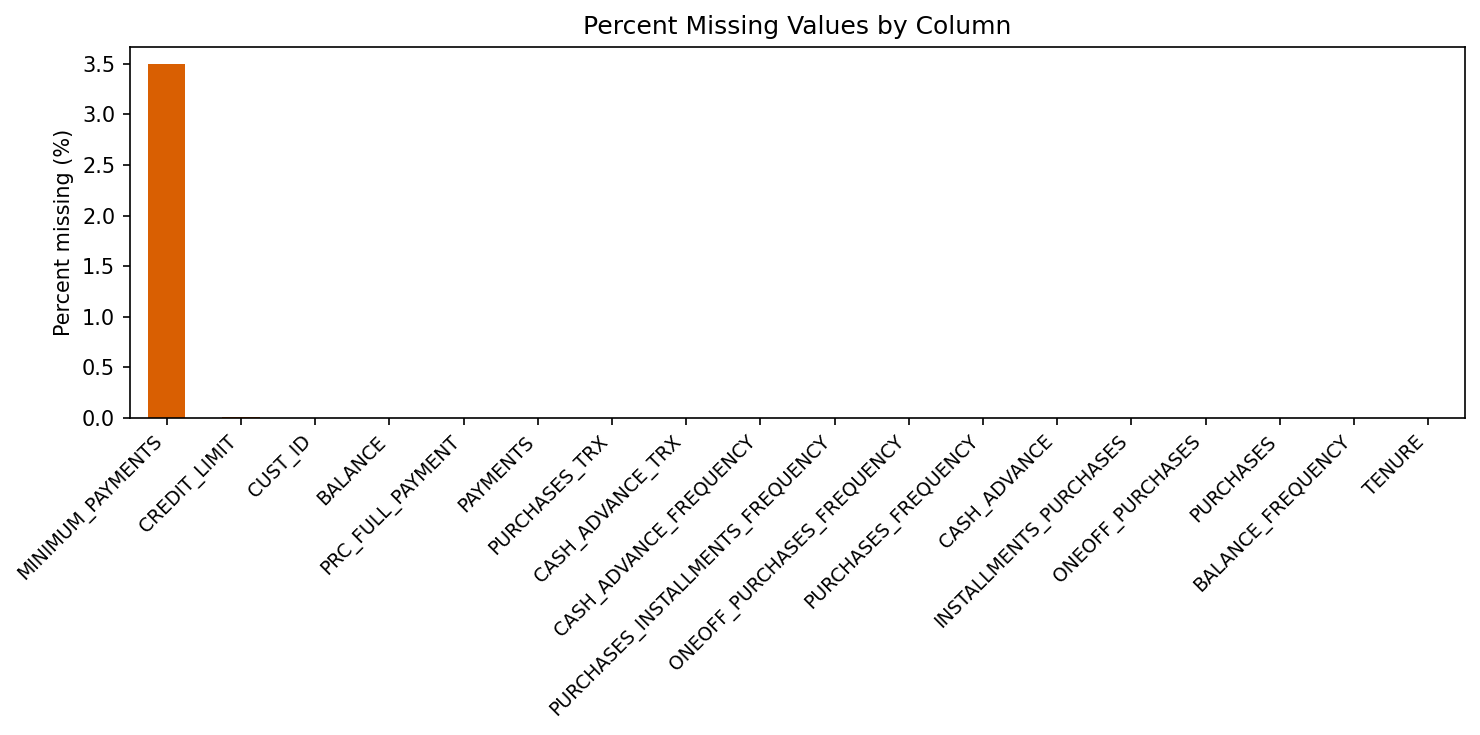

In [72]:
# percent missing
miss_pct = data.isnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10,5), dpi=150)
miss_pct.plot(kind="bar", color="#d95f02")
plt.ylabel("Percent missing (%)")
plt.title("Percent Missing Values by Column")
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.tight_layout()
plt.savefig("missing_percent_bar.png", dpi=300)   # for high-quality print
plt.show()

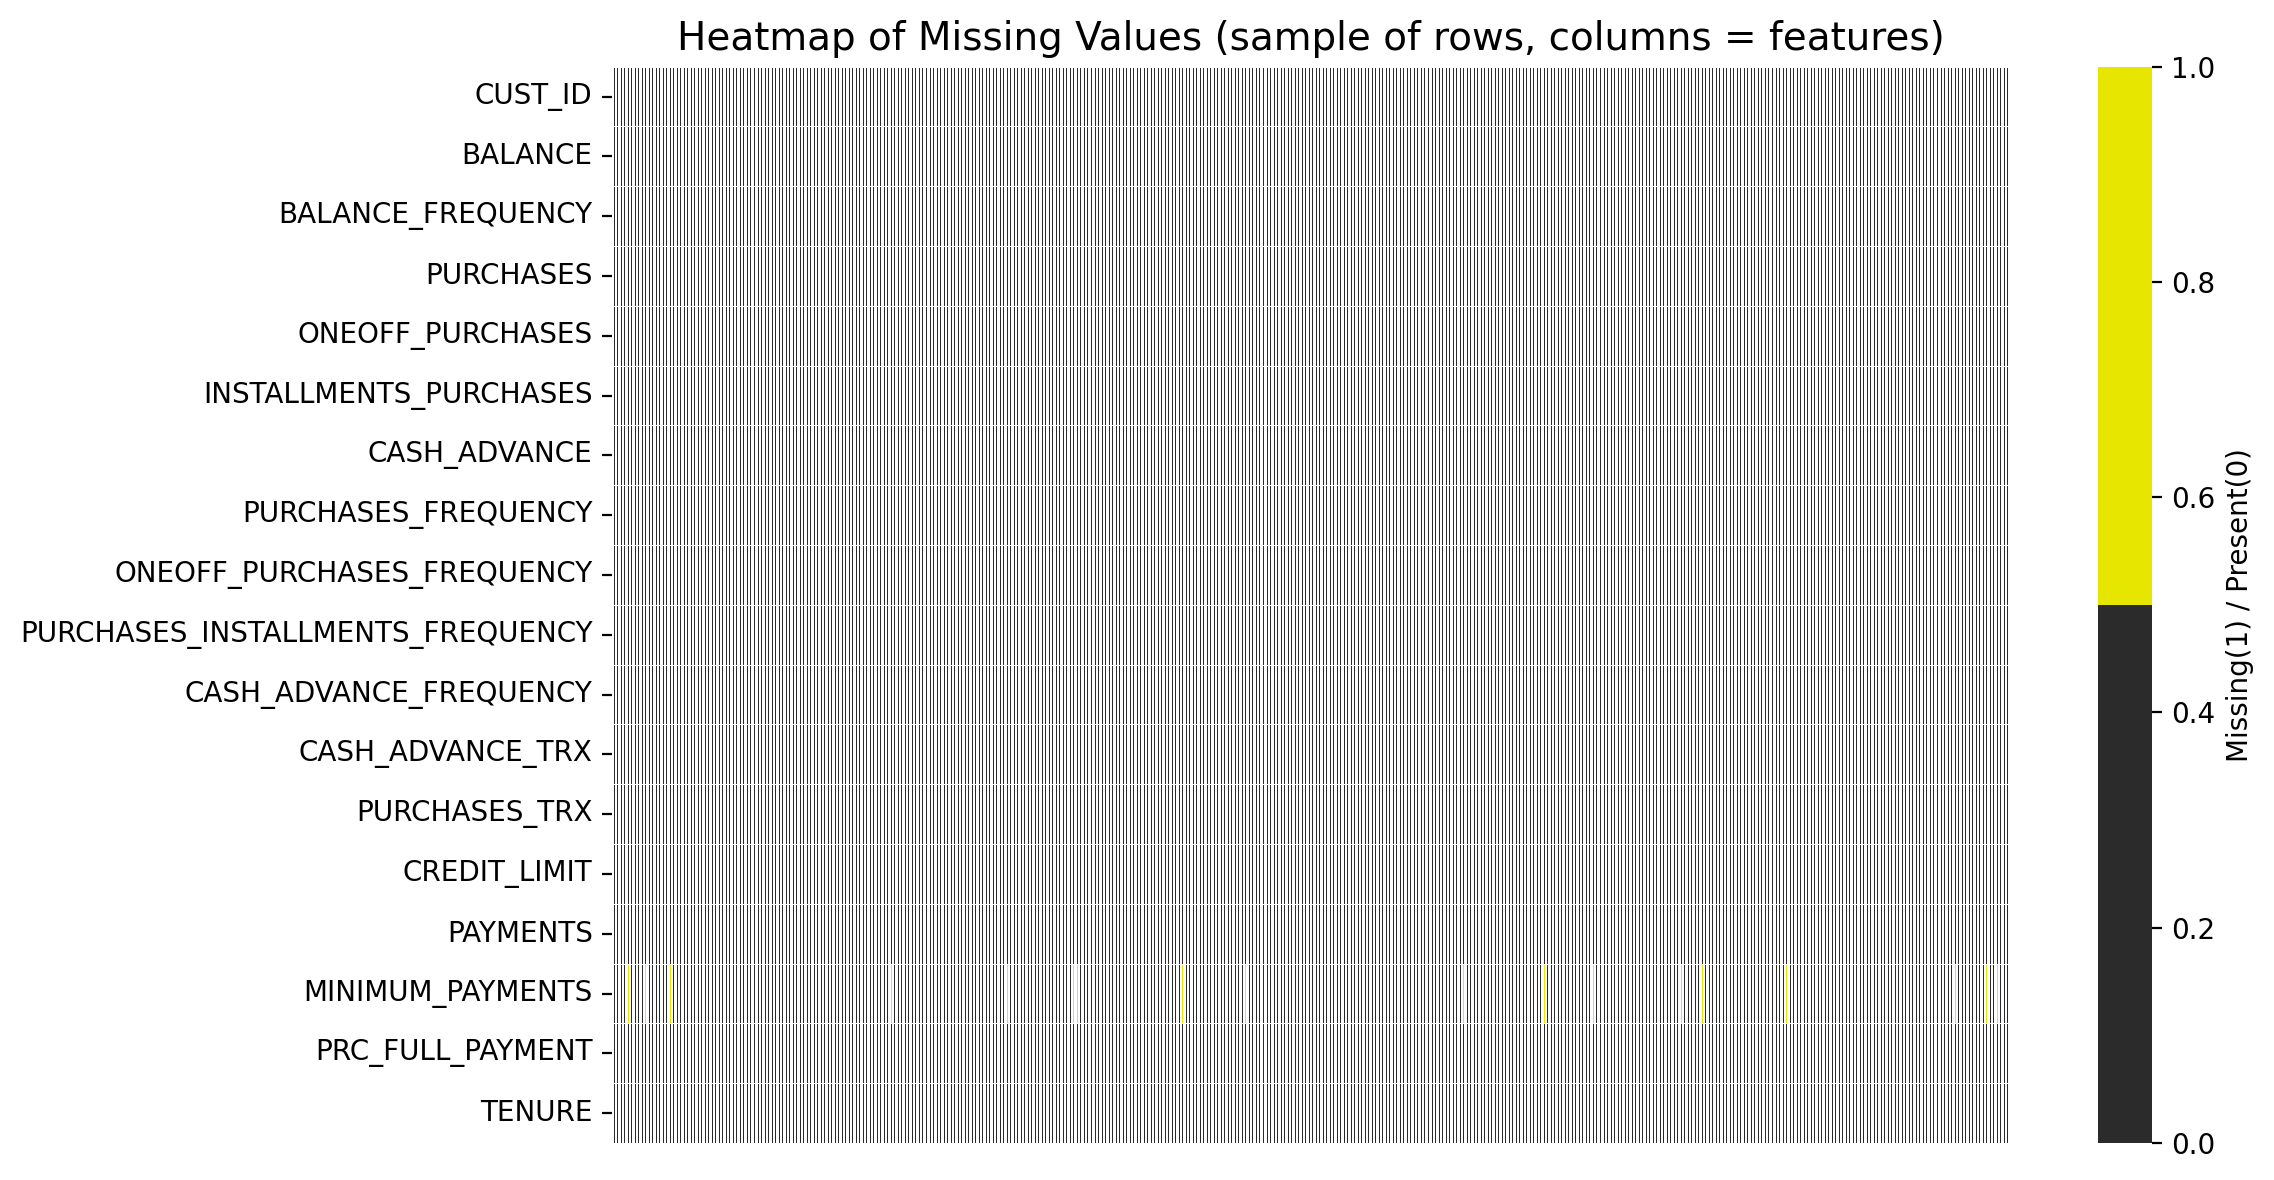

In [73]:
miss_int = data.isnull().astype(int)

# If the dataset is very tall, sample some indices to make the plot legible:
sampled = miss_int.sample(n=min(1000, len(miss_int)), random_state=0)  # sample up to 1000 rows
# transpose so features are rows
plot_matrix = sampled.T

plt.figure(figsize=(12,6), dpi=200)
sns.heatmap(plot_matrix, cmap=["#2b2b2b","#e6e600"], cbar=True, cbar_kws={'label':'Missing(1) / Present(0)'}, linewidths=0.2)
plt.yticks(rotation=0, fontsize=10)
plt.xticks([], [])     # hide x tick labels (row indices) to reduce clutter
plt.title("Heatmap of Missing Values (sample of rows, columns = features)", fontsize=14)
plt.tight_layout()
plt.savefig("missing_heatmap_transposed.png", dpi=300)
plt.show()

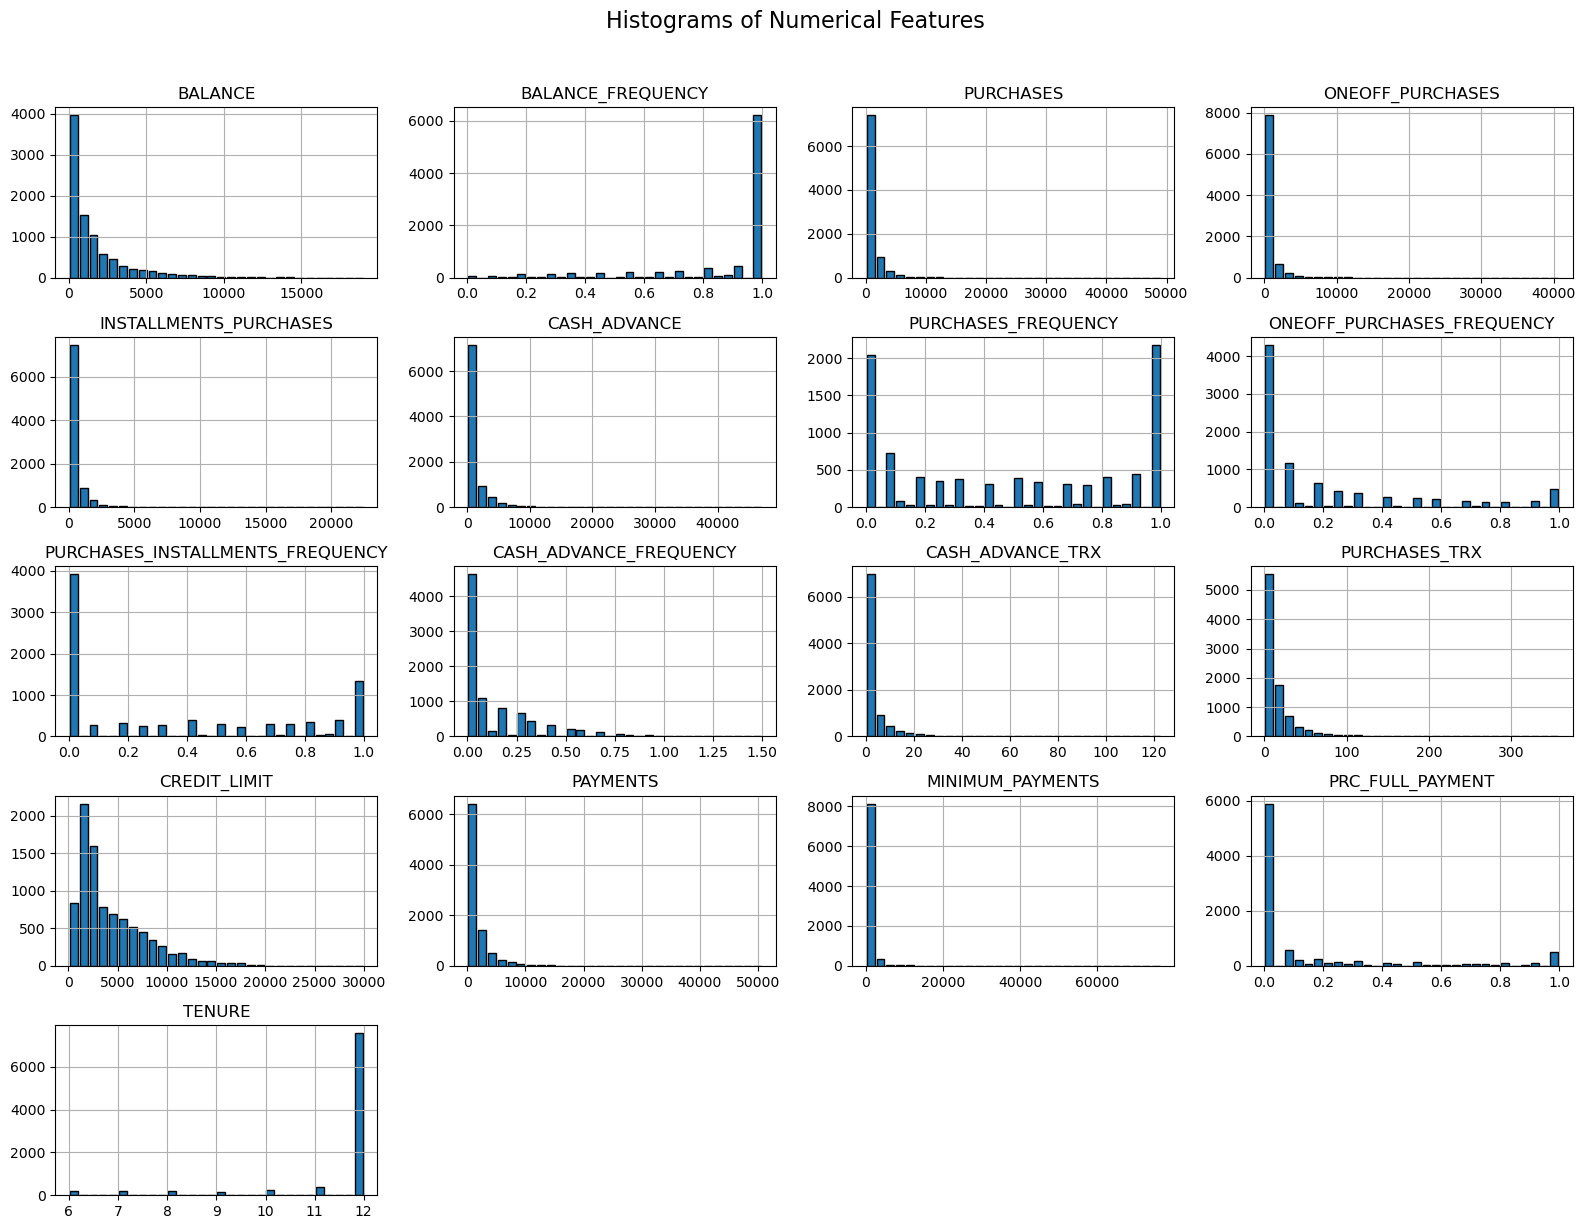

In [74]:
data.hist(figsize=(16,12), bins=30, edgecolor="black", rwidth=0.8)
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)  # move title slightly up
plt.tight_layout()  # prevents overlap
plt.show()
plt.show()

In [75]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [76]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [77]:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

In [78]:
data.drop(['CUST_ID', 'TENURE'], axis=1, inplace=True)

In [79]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [80]:
data.duplicated().sum()

0

In [81]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


In [82]:
col_names = data[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']]

In [83]:
print(col_names)

          BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
0       40.900749      95.40      0.000000        1000.0   201.802084   
1     3202.467416       0.00   6442.945483        7000.0  4103.032597   
2     2495.148862     773.17      0.000000        7500.0   622.066742   
3     1666.670542    1499.00    205.788017        7500.0     0.000000   
4      817.714335      16.00      0.000000        1200.0   678.334763   
...           ...        ...           ...           ...          ...   
8945    28.493517     291.12      0.000000        1000.0   325.594462   
8946    19.183215     300.00      0.000000        1000.0   275.861322   
8947    23.398673     144.40      0.000000        1000.0    81.270775   
8948    13.457564       0.00     36.558778         500.0    52.549959   
8949   372.708075    1093.25    127.040008        1200.0    63.165404   

      PRC_FULL_PAYMENT  PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  
0             0.000000             0.166667          

In [84]:
cols_to_transform = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 
                     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                     'PAYMENTS']
for col in cols_to_transform:
    data[col] = np.log1p(data[col])  # log(1+x) to handle zeros


In [85]:
features = ['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','PRC_FULL_PAYMENT','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY']

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])

In [87]:
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) == 0:
            # Handle empty cluster
            new_centroids.append(data[np.random.choice(data.shape[0])])
        else:
            new_centroid = cluster_points.mean(axis=0)
            new_centroids.append(new_centroid)
    return np.array(new_centroids)

def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids
    return centroids, clusters

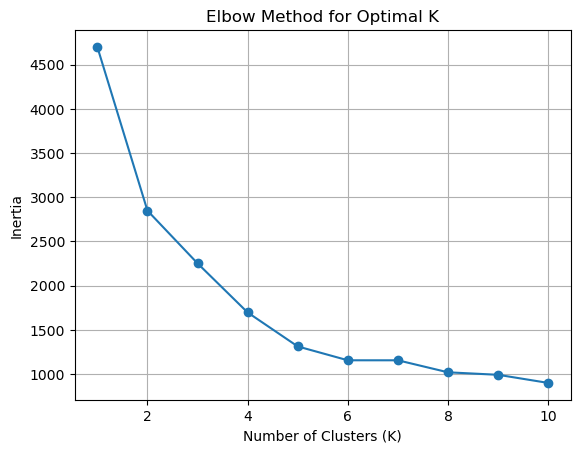

In [88]:
def calculate_inertia(data, kmeans_func, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans_func(data, k)
        inertia = 0
        for i, point in enumerate(data):
            centroid = centroids[clusters[i]]
            inertia += np.linalg.norm(point - centroid) ** 2
        inertias.append(inertia)
    return inertias

#Elbow Method
inertias = calculate_inertia(scaled_data, kmeans)
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

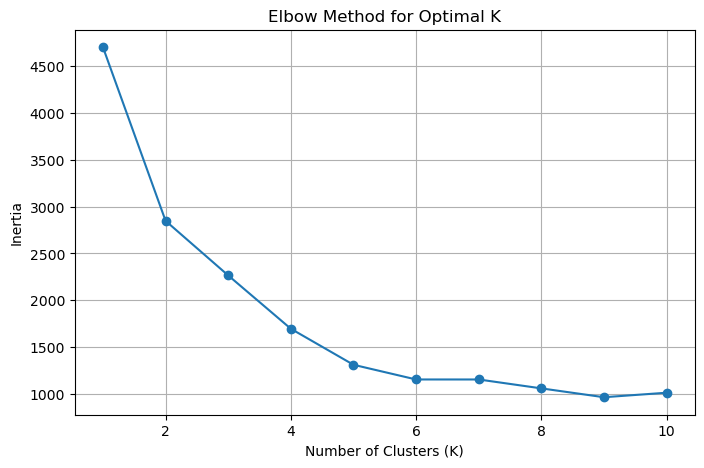

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_inertia(data, kmeans_func, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        centroids, clusters = kmeans_func(data, k)
        inertia = 0
        for i, point in enumerate(data):
            centroid = centroids[clusters[i]]
            inertia += np.linalg.norm(point - centroid) ** 2
        inertias.append(inertia)
    return inertias

# Run elbow method
inertias = calculate_inertia(scaled_data, kmeans)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Initialize random centroids
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], size=k, replace=False)
    return data[indices]
# Step 2: Assign points to nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = np.linalg.norm(point - centroids, axis=1)
        clusters.append(np.argmin(distances))
    return np.array(clusters)
# Step 3: Update centroids based on cluster mean
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) == 0:
            # Handle empty cluster
            new_centroids.append(data[np.random.randint(0, data.shape[0])])
        else:
            new_centroid = cluster_points.mean(axis=0)
            new_centroids.append(new_centroid)
    return np.array(new_centroids)
# Full K-Means function
def kmeans(data, k=4, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids, atol=tol):
            break
        centroids = new_centroids
    return centroids, clusters

In [ ]:
centroids, clusters = kmeans(scaled_data, k=4)

In [ ]:
data['Segment'] = clusters

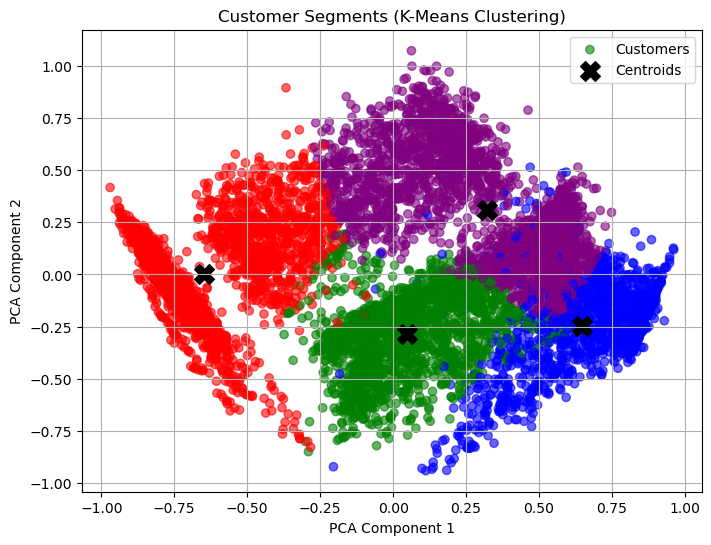

In [93]:
from sklearn.decomposition import PCA
# Reduce dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Assign clusters if not already done
centroids, clusters = kmeans(scaled_data, k=4)

# Create a color map for clusters
colors = ['red', 'green', 'blue', 'purple']
cluster_colors = [colors[label] for label in clusters]
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_colors, alpha=0.6, label='Customers')

# Project centroids into reduced PCA space (optional)
reduced_centroids = pca.transform(centroids)
plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (K-Means Clustering)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
segment_analysis = data.groupby('Segment')[features].mean()
print(segment_analysis)

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")


In [ ]:
!pip install joblib

In [ ]:
# Save the centroids and the scaler
joblib.dump(centroids, "centroids.pkl")
joblib.dump(scaler, "scaler.pkl")

In [ ]:
print("Centroids min/max:", centroids.min(), centroids.max())
print("Scaled data min/max:", scaled_data.min(), scaled_data.max())

In [94]:
ks = [2, 3, 4, 5, 6]  # different cluster counts
results = {}

for k in ks:
    centroids, clusters = kmeans(scaled_data, k=k)
    
    # Calculate inertia for this k
    inertia = 0
    for i, point in enumerate(scaled_data):
        centroid = centroids[clusters[i]]
        inertia += np.linalg.norm(point - centroid) ** 2
    
    results[k] = inertia
    print(f"K={k}, Inertia={inertia:.2f}")


K=2, Inertia=2849.33
K=3, Inertia=2266.03
K=4, Inertia=1697.00
K=5, Inertia=1312.62
K=6, Inertia=1155.84
